In [1]:
import pandas as pd

data=pd.read_csv('advertising.csv')
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


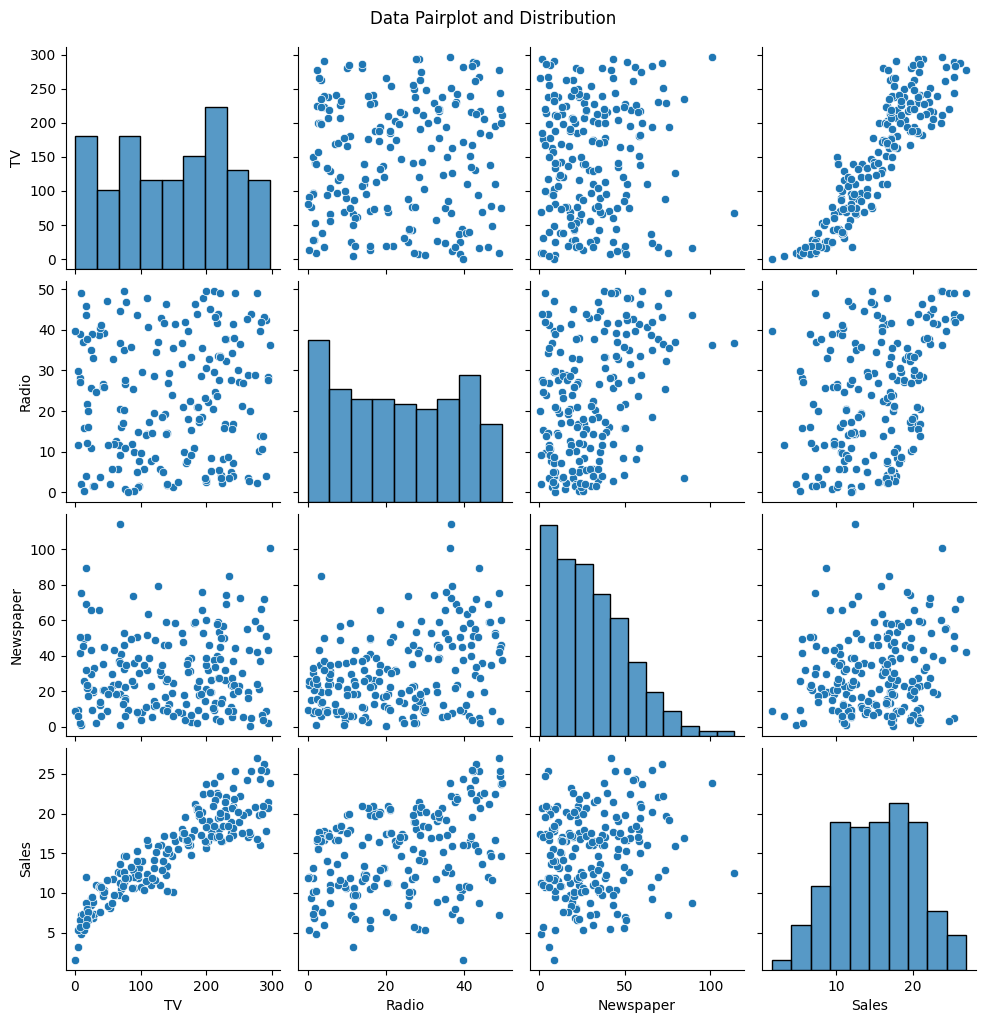

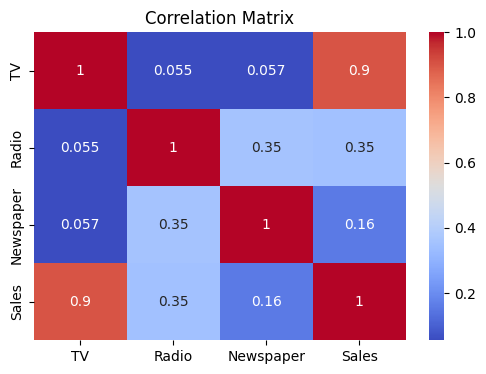

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.suptitle('Data Pairplot and Distribution',y=1.02)
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [3]:
data.shape

(200, 4)

In [4]:
# preprocessing
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
import numpy as np

In [6]:
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

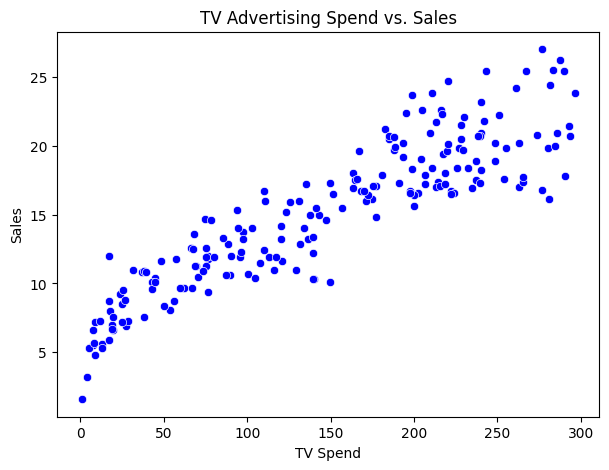

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='TV', y='Sales', data=data, color='blue')
plt.title('TV Advertising Spend vs. Sales')
plt.xlabel('TV Spend')
plt.ylabel('Sales')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_b =np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test_b = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
print("Shape of X_train_b:", X_train_b.shape)

Shape of X_train_b: (150, 4)


In [9]:
X = np.c_[np.ones(X.shape[0]), X]

In [10]:
def MSE(y,y_pred):
  return np.mean(np.power(y-y_pred,2))

In [11]:
X.shape

(200, 4)

In [20]:
def batch_sgd(X, y, lr=0.00001, epochs=1000):
    np.random.seed(0)
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features)
    losses = []
    for epoch in range(epochs):
        y_pred = X.dot(weights)
        error = y_pred - y
        loss = np.mean(error ** 2)
        losses.append(loss)
        grad = 2 * X.T.dot(error) / n_samples
        weights -= lr * grad
    return weights, losses

In [21]:
def online_sgd(X, y, lr=0.00001, epochs=1000):
    np.random.seed(0)
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features)
    losses = []
    for epoch in range(epochs):
        for i in range(n_samples):
            xi = X[i, :]
            yi = y[i]
            y_pred = xi.dot(weights)
            error = y_pred - yi
            grad = 2 * xi * error
            weights -= lr * grad
        # Evaluate loss at the end of each epoch
        y_pred_epoch = X.dot(weights)
        error_epoch = y_pred_epoch - y
        loss = np.mean(error_epoch ** 2)
        losses.append(loss)
    return weights, losses

In [22]:
weights_batch, batch_losses = batch_sgd(X, y)
weights_online, online_losses = online_sgd(X, y)

In [15]:
new_point = np.array([1, 150, 20, 30])  # Include bias as 1
batch_pred = new_point.dot(weights_batch)
online_pred = new_point.dot(weights_online)
print("Batch SGD Prediction:", batch_pred)
print("Online SGD Prediction:", online_pred)


Batch SGD Prediction: 14.438723205442432
Online SGD Prediction: 14.963583554957061


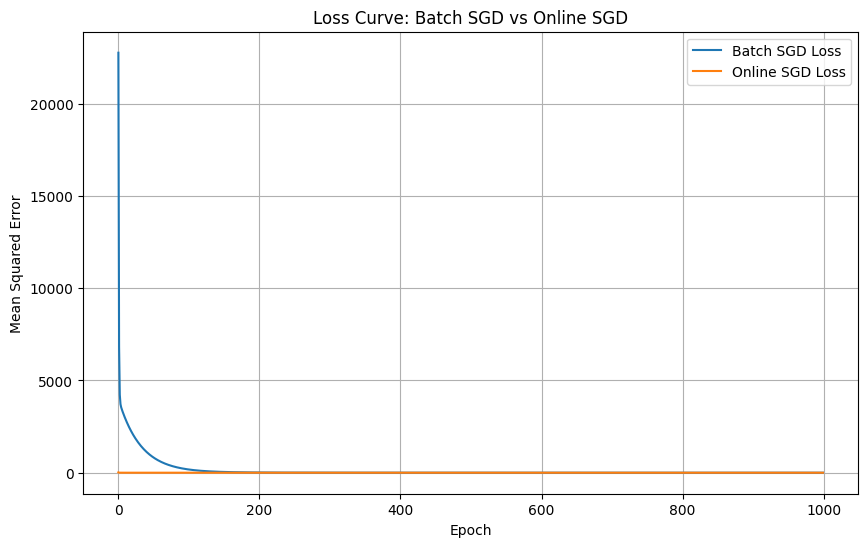

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(batch_losses, label='Batch SGD Loss')
plt.plot(online_losses, label='Online SGD Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve: Batch SGD vs Online SGD')
plt.legend()
plt.grid(True)
plt.show()

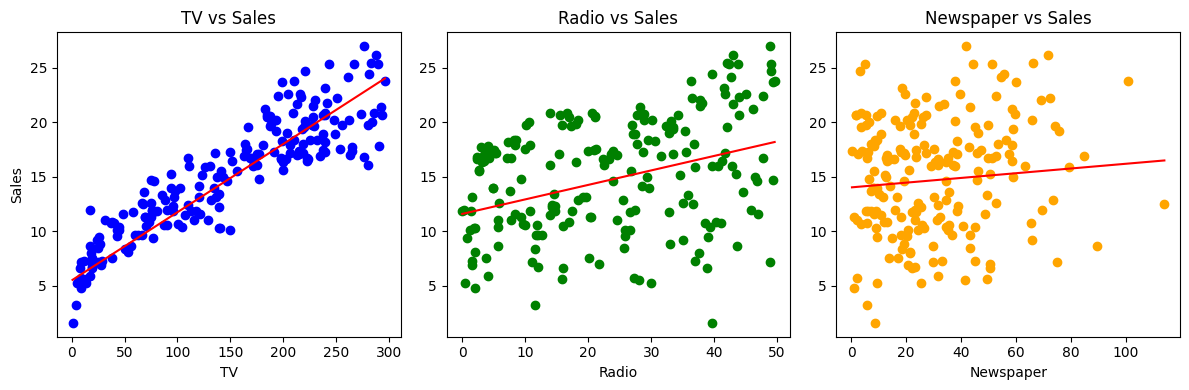

In [26]:
plt.figure(figsize=(12, 4))

# TV
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], y, c='blue')
tv_range = np.linspace(data['TV'].min(), data['TV'].max(), 100)
X_tv = np.c_[
    np.ones(100),
    tv_range,
    np.repeat(np.mean(data['Radio']), 100),
    np.repeat(np.mean(data['Newspaper']), 100)
]

tv_reg = X_tv.dot(weights_batch)
plt.plot(tv_range, tv_reg, 'r')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

# Radio
plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], y, c='green')
radio_range = np.linspace(data['Radio'].min(), data['Radio'].max(), 100)
X_radio = np.c_[
    np.ones(100),
    np.repeat(np.mean(data['TV']), 100),
    radio_range,
    np.repeat(np.mean(data['Newspaper']), 100)
]
radio_reg = X_radio.dot(weights_batch)
plt.plot(radio_range, radio_reg, 'r')
plt.title('Radio vs Sales')
plt.xlabel('Radio')

# Newspaper
plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], y, c='orange')
news_range = np.linspace(data['Newspaper'].min(), data['Newspaper'].max(), 100)
X_news = np.c_[
    np.ones(100),
    np.repeat(np.mean(data['TV']), 100),
    np.repeat(np.mean(data['Radio']), 100),
    news_range
]
news_reg = X_news.dot(weights_batch)
plt.plot(news_range, news_reg, 'r')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')

plt.tight_layout()
plt.show()


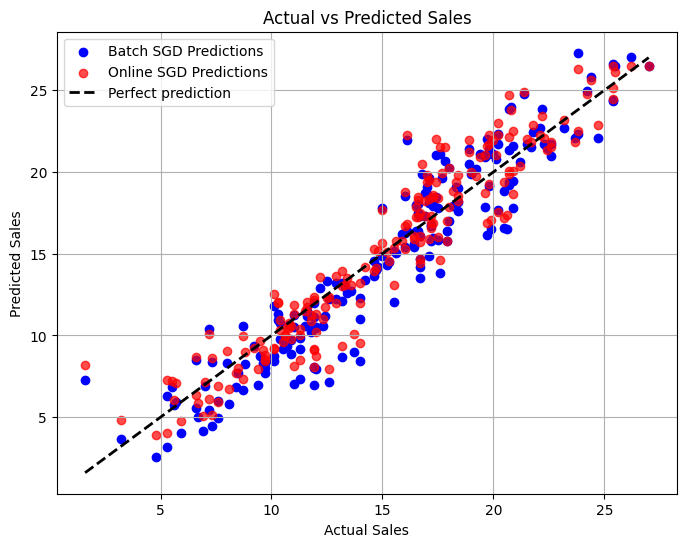

In [28]:
X_b = X 

plt.figure(figsize=(8, 6))
plt.scatter(y, X_b.dot(weights_batch), color='blue', label='Batch SGD Predictions')
plt.scatter(y, X_b.dot(weights_online), color='red', alpha=0.7, label='Online SGD Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()
